In [38]:
import numpy as np  # Импорт библиотеки NumPy для работы с многомерными массивами и числовыми операциями
import pandas as pd  # Импорт библиотеки Pandas для обработки и анализа данных в таблицах (DataFrame)
from scipy.stats import mannwhitneyu  # Импорт теста Манна-Уитни для проверки различий между независимыми выборками
from scipy.stats import ttest_ind  # Импорт t-теста для независимых выборок для проверки различий в средних значениях
from scipy.stats import norm  # Импорт нормального распределения для работы с статистикой и вероятностями
import matplotlib.pyplot as plt  # Импорт библиотеки Matplotlib для визуализации данных (построение графиков)
import seaborn as sns  # Импорт библиотеки Seaborn для более удобной визуализации данных, построение графиков
from tqdm.auto import tqdm  # Импорт библиотеки tqdm для отображения прогресса выполнения операций (например, при циклах)
from scipy.stats import pearsonr  # Импорт коэффициента корреляции Пирсона для оценки линейной зависимости между двумя переменными
from scipy.stats import shapiro  # Импорт теста Шапиро-Уилка для проверки нормальности распределения данных
from scipy.stats import chi2_contingency  # Импорт теста хи-квадрат для проверки независимости категориальных переменных
from scipy.stats import ttest_ind  # (Повторно) Импорт t-теста для независимых выборок (удалить дублирование)


In [39]:
path = 'ab_testing.csv'
df = pd.read_csv(path)
df.columns = df.columns.str.strip()
# убираем пробелы в колонках, но только в колонках, не в столбцах хы



In [40]:
## Удаление пробелов в конце и начале значений во всех столбцах
## df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Удаление всех пробелов внутри строк (например, " hello world " → "helloworld")
# df = df.apply(lambda x: x.str.replace(" ", "") if x.dtype == "object" else x)

# Удаление пробелов в конкретном столбце, например, Page Views
# df["Page Views"] = df["Page Views"].astype(str).str.strip()


In [41]:
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


In [42]:
df.nunique()

User ID       5000
Group            2
Page Views      14
Time Spent     410
Conversion       2
Device           2
Location         4
dtype: int64

In [43]:
df.describe()

# Метод describe показывает основные статистические 
# характеристики данных по каждому числовому признаку  (типы int64 и float64): число непропущенных значений,
# среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили

,User ID,Page Views,Time Spent
count,5000.000000,5000.000000,5000.000000
mean,14925.159000,7.537600,242.512600
std,2869.153773,4.022465,118.254153
min,10001.000000,1.000000,40.000000
25%,12456.250000,4.000000,137.000000
50%,14858.500000,8.000000,243.000000
75%,17379.750000,11.000000,346.000000
max,19995.000000,14.000000,449.000000


# Revenue(выручка) - это общая сумма денег

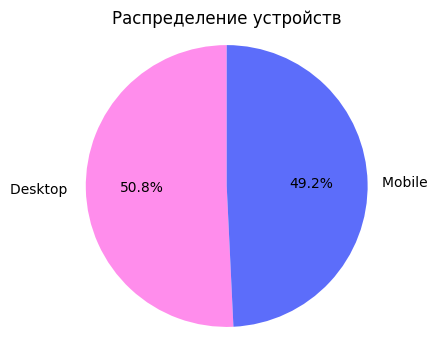

In [44]:
device_count = df["Device"].value_counts()
plt.figure(figsize=(4,4))
plt.pie(device_count, labels=device_count.index, startangle=90, colors=["#ff8dec","#5c6dfa"], autopct='%1.1f%%')
plt.title("Pаспределение устройств")
plt.axis("equal")
plt.show()


# Распределение конверсий 'Yes' по устройствам

In [45]:
yes_count = df["Conversion"].value_counts()
countversinss = yes_count.get("Yes", 0)
print(countversinss)

0


In [46]:
desctop_yes = df[(df["Device"] == "Desktop ") & (df["Conversion"] == "Yes        ")]
mobile_yes = df[(df["Device"] == "Mobile  ") & (df["Conversion"] == "Yes        ")]

conversion_counts = pd.Series({
    "Desktop ": desctop_yes.shape[0],
    "Mobile  ": mobile_yes.shape[0]
})# Подсчёт количества 'Yes' для каждого типа устройства


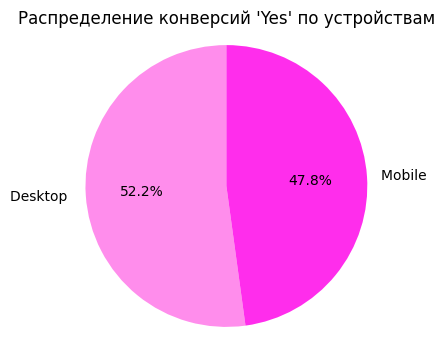

In [47]:
plt.figure(figsize=(4, 4))
plt.pie(conversion_counts, 
        labels=conversion_counts.index, 
        startangle=90, 
        colors=["#ff8dec","#ff2dec"], 
        autopct='%1.1f%%')
# plt.pie(conversion_counts, labels=conversion_counts.index, startangle=90, colors=["#ff8dec","#5c6dfa"], autopct='%1.1f%%')
plt.title("Распределение конверсий 'Yes' по устройствам")
plt.axis("equal") 
plt.show()

# Количественный кагортный анализ

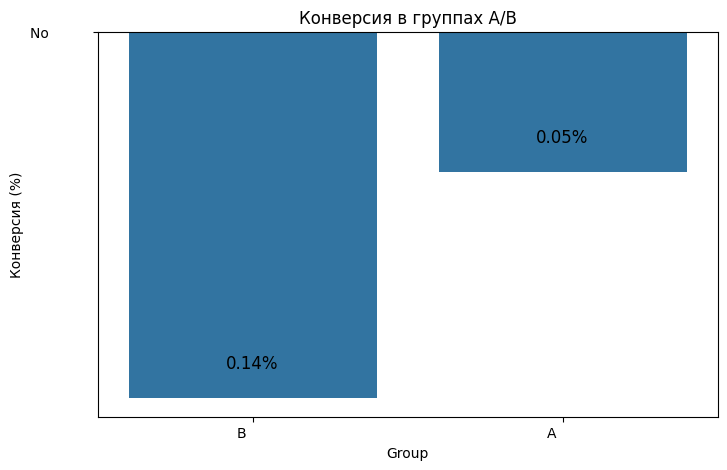

In [48]:
# df["Conversion"] = df["Conversion"].apply(lambda x: 1 if x == "Yes" else 0)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Group", y="Conversion", data=df, errorbar=None)
plt.title("Конверсия в группах A/B")
plt.ylabel("Конверсия (%)")

for p in ax.patches:
    height = p.get_height()  # Получаем высоту столбца (конверсия)
    ax.text(p.get_x() + p.get_width() / 2, height - 0.01, f'{height:.2f}%', 
            ha='center', va='bottom', fontsize=12)

plt.show()


# Определение количества пользователей с разных гео точек

In [49]:
ireland = df[(df["Location"] == "Northern Ireland")].value_counts()
scotland = df[(df["Location"] == "Scotland")].value_counts()
wales = df[(df["Location"] == "Wales")].value_counts()
england = df[(df["Location"] == "England")].value_counts()

locations = pd.Series({
    "Northern Ireland": ireland.shape[0],
    "Scotland" : scotland.shape[0],
    "Wales" : wales.shape[0],
    "England" : england.shape[0]
})

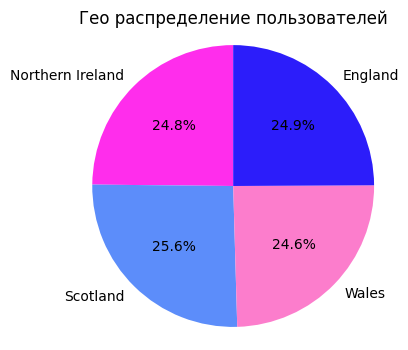

In [50]:
plt.figure(figsize=(4, 4))
plt.pie(locations, 
        labels=locations.index, 
        startangle=90, 
        colors=["#ff2dec","#5c8dfa","#fc7dcc","#2c1dfa" ], 
        autopct='%1.1f%%')
# plt.pie(conversion_counts, labels=conversion_counts.index, startangle=90, colors=["#ff8dec","#5c6dfa"], autopct='%1.1f%%')
plt.title("Гео распределение пользователей")
plt.axis("equal") 
plt.show()

# Корреляция между Time Spent (время на сайте) и Conversion (конверсия)

### (Boxplot) со средними значениями

t-статистика: 0.1484405375355954
p-значение: 0.8820010984283878


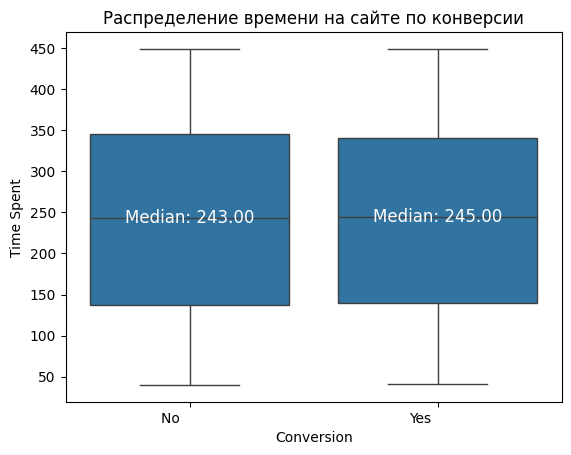

In [51]:
Yes_conversion = df[(df["Conversion"] == "Yes        ")]
No_conversion = df[(df["Conversion"] == "No         ")]

# Анализ с использованием t-теста для проверки различий в "Time Spent" между группами
t_stat, p_value = ttest_ind(Yes_conversion["Time Spent"], No_conversion["Time Spent"])

# Вывод результатов
print(f"t-статистика: {t_stat}")
print(f"p-значение: {p_value}")

# Если p-value меньше 0.05, то различие статистически значимо

# Визуализация
sns.boxplot(x='Conversion', y='Time Spent', data=df)
plt.title('Распределение времени на сайте по конверсии')

# Добавляем текст с медианой для каждой группы
median_yes = Yes_conversion["Time Spent"].median()  # Медиана для "Yes"
median_no = No_conversion["Time Spent"].median()  # Медиана для "No"

# Добавление аннотации на график
plt.text(0, median_no, f'Median: {median_no:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=12, color='white')
plt.text(1, median_yes, f'Median: {median_yes:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=12, color='white')

plt.show()

# t-статистику (t_stat), которая показывает величину различий между средними значениями двух групп относительно их вариации.
# p-значение (p_value), которое помогает нам принять решение о статистической значимости различий

### Ящик с усами (Boxplot) для двух групп "Yes" и "No" без средних значений

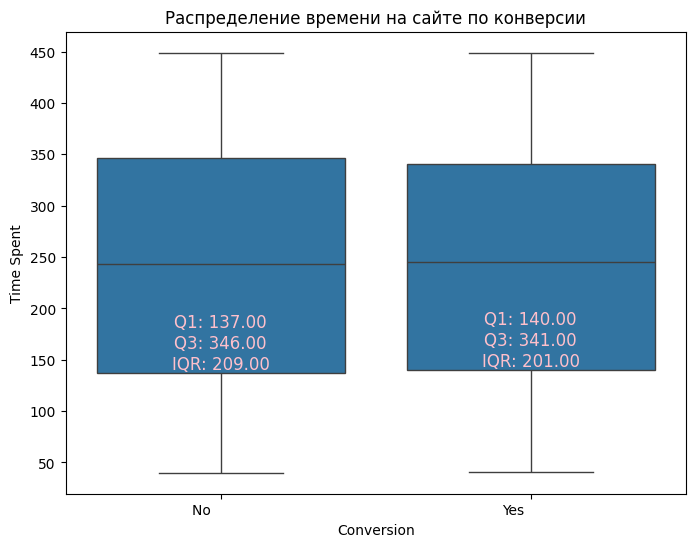

In [52]:
# Визуализация - Ящик с усами
plt.figure(figsize=(8,6))
sns.boxplot(x='Conversion', y='Time Spent', data=df)
plt.title('Распределение времени на сайте по конверсии')

# Добавляем текст с дополнительной статистикой (например, квартиль)
Q1_yes = Yes_conversion["Time Spent"].quantile(0.25)  # 1-й квартиль
Q3_yes = Yes_conversion["Time Spent"].quantile(0.75)  # 3-й квартиль
IQR_yes = Q3_yes - Q1_yes  # Интерквартильный размах

Q1_no = No_conversion["Time Spent"].quantile(0.25)    # 1-й квартиль
Q3_no = No_conversion["Time Spent"].quantile(0.75)    # 3-й квартиль
IQR_no = Q3_no - Q1_no  # Интерквартильный размах

# Добавление аннотации на график с квартилями
plt.text(0, Q1_no, f'Q1: {Q1_no:.2f}\nQ3: {Q3_no:.2f}\nIQR: {IQR_no:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=12, color='pink')
plt.text(1, Q1_yes, f'Q1: {Q1_yes:.2f}\nQ3: {Q3_yes:.2f}\nIQR: {IQR_yes:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=12, color='pink')

plt.show()

# График для конверсий в каждой группе A и B

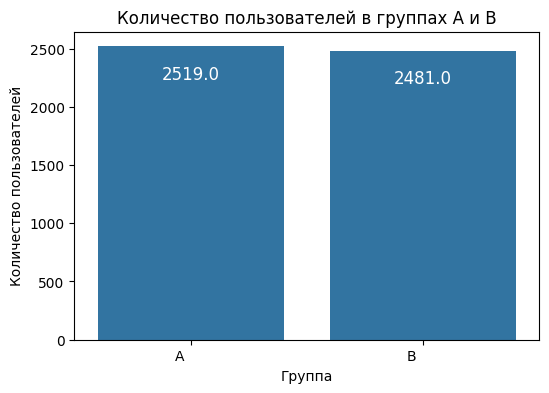

In [ ]:
#  График распределения пользователей по группам A и B
group_counts = df['Group'].value_counts()

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=group_counts.index, y=group_counts.values)

# Добавляем числа на столбцы ниже
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='white', 
                xytext=(0, -20), textcoords='offset points')  # смещение вниз

plt.title("Количество пользователей в группах A и B")
plt.ylabel("Количество пользователей")
plt.xlabel("Группа")
plt.show()


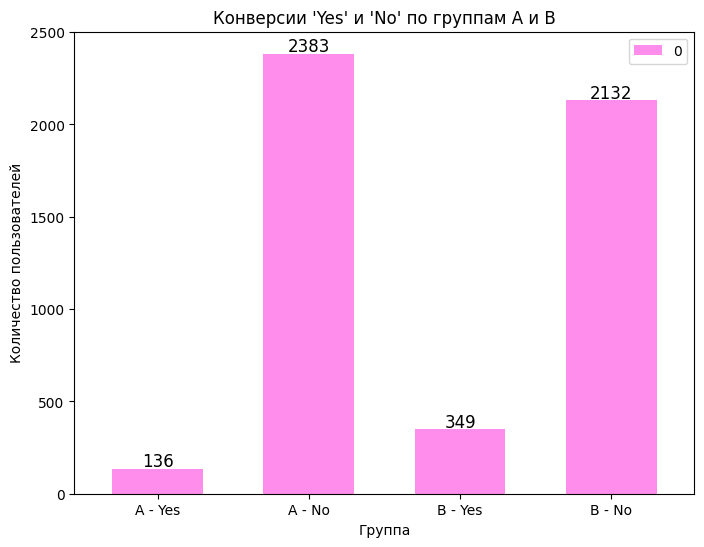

In [73]:
# График конверсий по группам A и B # Фильтруем данные по группам A и B
a = df[df['Group'] == 'A     ']
b = df[df['Group'] == 'B     ']

# Подсчитываем количество "Yes" и "No" в группе A
conversion_counts_a = a['Conversion'].value_counts().reindex(['Yes        ', 'No         '], fill_value=0)

# Подсчитываем количество "Yes" и "No" в группе B
conversion_counts_b = b['Conversion'].value_counts().reindex(['Yes        ', 'No         '], fill_value=0)

# Создаем DataFrame для визуализации
conversion_data = pd.DataFrame({
    'A - Yes': [conversion_counts_a['Yes        ']],
    'A - No': [conversion_counts_a['No         ']],
    'B - Yes': [conversion_counts_b['Yes        ']],
    'B - No': [conversion_counts_b['No         ']]
})

# Визуализируем конверсии по группам
ax = conversion_data.T.plot(kind='bar', stacked=True, figsize=(8, 6), color=["#ff8dec", "#5c6dfa"], width=0.6)

# Добавляем аннотации (числа) на столбцы
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')  # смещение вверх для чисел

plt.title("Конверсии 'Yes' и 'No' по группам A и B")
plt.ylabel("Количество пользователей")
plt.xlabel("Группа")
plt.xticks(rotation=0)
plt.show()


### Расчёт процента конверсий "Yes" для каждой группы:

1. **Группа A:**
   - Всего в группе A: 2519 человек
   - "Yes" в группе A: 136 человек

2. **Группа B:**
   - Всего в группе B: 2481 человек
   - "Yes" в группе B: 349 человек
   

### Вывод: Группа B имеет более высокую конверсию "Yes" по сравнению с группой A
- В группе A **5.4%** людей сказали "Yes".
- В группе B **14.1%** людей сказали "Yes".




In [75]:

conversion_percentage_a = (conversion_counts_a['Yes        '] / len(a)) * 100
conversion_percentage_b = (conversion_counts_b['Yes        '] / len(b)) * 100

print(f"Процент Yes в группе A: {conversion_percentage_a:.2f}%")
print(f"Процент Yes в группе B: {conversion_percentage_b:.2f}%")


Процент Yes в группе A: 5.40%
Процент Yes в группе B: 14.07%
